# Method Results Analysis Notebook

## GRPO Sections

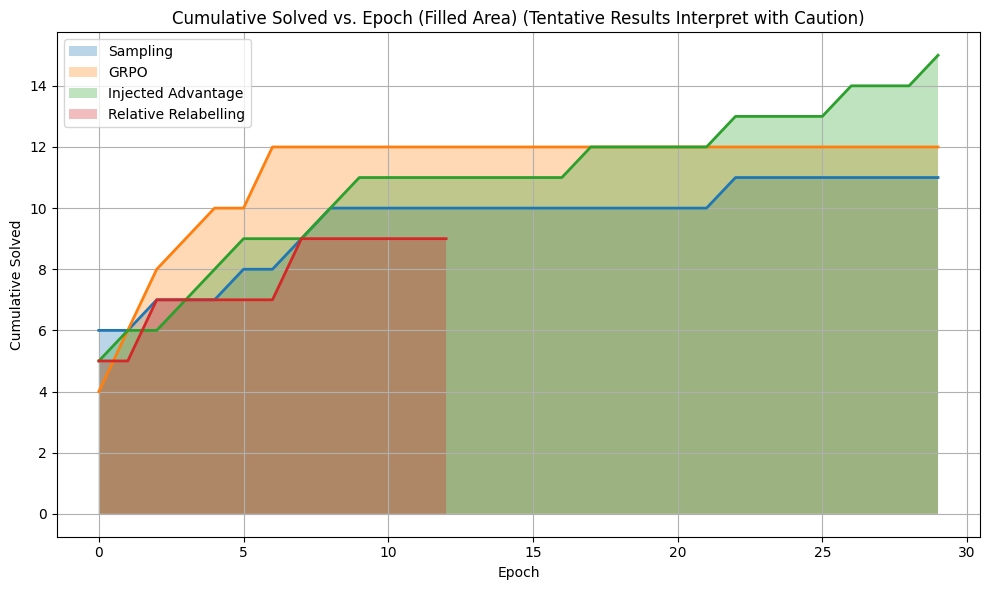

In [19]:
import json
import matplotlib.pyplot as plt
import os

# List your files (you can automate this with os.listdir or glob)
files = [
    "../results/sample/epoch_stats.jsonl",
    "../results/grpo/epoch_stats.jsonl",
    "../results/sparsegrpo/epoch_stats.jsonl",
    "../results/internalgrpo/epoch_stats.jsonl"
]

# Optional labels
labels = [
    "Sampling",
    "GRPO",
    "Injected Advantage",
    "Relative Relabelling"
]

# Plot setup
plt.figure(figsize=(10, 6))

for file, label in zip(files, labels):
    data = []
    with open(file, "r") as f:
        for line in f:
            data.append(json.loads(line))

    # Extract data
    epochs = [entry["epoch"] for entry in data]
    cumulative_solved = [entry["cumulative_solved"] for entry in data]

    # Fill area under curve
    plt.fill_between(epochs, cumulative_solved, alpha=0.3, label=label)
    # Optional: draw line as well
    plt.plot(epochs, cumulative_solved, linewidth=2)

# Final touches
plt.title("Cumulative Solved vs. Epoch (Filled Area) (Tentative Results Interpret with Caution)")
plt.xlabel("Epoch")
plt.ylabel("Cumulative Solved")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Search Section

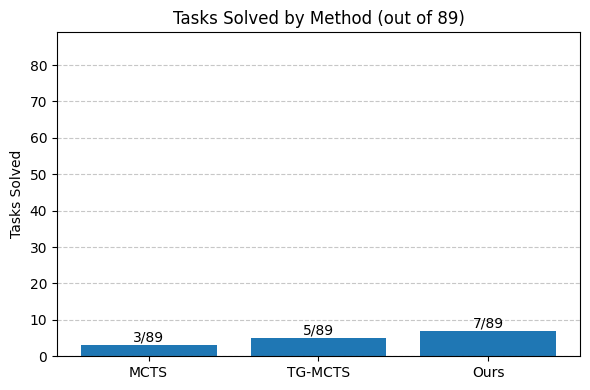

In [21]:
import matplotlib.pyplot as plt

# Data
methods = ['MCTS', 'TG-MCTS', 'Ours']
solved = [3, 5, 7]
total = 89

# Plot
plt.figure(figsize=(6, 4))
plt.bar(methods, solved)
plt.ylim(0, total)
plt.ylabel('Tasks Solved')
plt.title('Tasks Solved by Method (out of 89)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values
for i, val in enumerate(solved):
    plt.text(i, val + 1, f'{val}/{total}', ha='center')

plt.tight_layout()
plt.show()
